# *Problem Statement:*
- #### Yulu is India’s leading micro-mobility service provider, which offers unique vehicles for the daily commute. Starting off as a mission to eliminate   traffic congestion in India, Yulu provides the safest commute solution through a user-friendly mobile app to enable shared, solo and sustainable commuting.

- #### Yulu zones are located at all the appropriate locations (including metro stations, bus stands, office spaces, residential areas, corporate offices, etc) to make those first and last miles smooth, affordable, and convenient!

- #### Yulu has recently suffered considerable dips in its revenues. They have contracted a consulting company to understand the factors on which the demand for these shared electric cycles depends. Specifically, they want to understand the factors affecting the demand for these shared electric cycles in the Indian market.*

# *Objective of Analysis*
### *The Main objective of analysing the Yulu dataset is to identify, how predefined factors affecting the demand for these shared electric cycles*

In [132]:
# Data Manipulation
import numpy as np
import pandas as pd
import scipy.stats as stats
from scipy.stats import chi2_contingency

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.subplots as sp
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

In [133]:
df=pd.read_csv(r"C:\Users\Agila\Downloads\Yulu_EDA\yulu_bike_sharing_dataset.csv",index_col=False)

In [134]:
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

# *Data Understanding*

In [135]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [136]:
print(f"The number of rows in th dataset: {df.shape[0]}\nThe number of columns in th dataset: {df.shape[1]}")

The number of rows in th dataset: 10886
The number of columns in th dataset: 12


In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [138]:
df['datetime']=pd.to_datetime(df['datetime'])

In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


# *Basic Statistics*

In [140]:
df.describe()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2011-12-27 05:56:22.399411968,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
min,2011-01-01 00:00:00,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2011-07-02 07:15:00,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,2012-01-01 20:30:00,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,2012-07-01 12:45:00,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,2012-12-19 23:00:00,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000
std,NaN,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454


In [141]:
df.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [142]:
df.duplicated().sum()

0

In [143]:
df.skew(numeric_only =True)

season       -0.007076
holiday       5.660517
workingday   -0.776163
weather       1.243484
temp          0.003691
atemp        -0.102560
humidity     -0.086335
windspeed     0.588767
casual        2.495748
registered    1.524805
count         1.242066
dtype: float64

# *Skewness Analysis of Variables*
### *Symmetrical Majority:*
###          - *The majority of the variables, including 'season' and 'temp', exhibit skewness values close to zero, suggesting relatively symmetrical distributions.*
          
### *Positive Skewness Insights:*
###           - *Variables such as 'holiday', 'weather', 'windspeed', 'casual', 'registered', and 'count' demonstrate positive skewness, pointing to a concentration of lower values and a rightward skew in their distributions.*

#### *Negative Skewness Observations:*
###            - *In contrast, 'workingday', 'atemp', and 'humidity' exhibit negative skewness, implying a concentration of higher values and a leftward skew in their distributions.*

In [144]:
# Uniques values of each columns

df.nunique()

datetime      10886
season            4
holiday           2
workingday        2
weather           4
temp             49
atemp            60
humidity         89
windspeed        28
casual          309
registered      731
count           822
dtype: int64

In [145]:
# data info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [146]:
# converting the categorical columns into category
cat_col = ['season', 'holiday', 'workingday', 'weather']

for i in cat_col:
 df[i] = df[i].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  category      
 2   holiday     10886 non-null  category      
 3   workingday  10886 non-null  category      
 4   weather     10886 non-null  category      
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: category(4), datetime64[ns](1), float64(3), int64(4)
memory usage: 723.7 KB


In [147]:
# creating new column from datetime and converting them to categories
df["year"]= df["datetime"].dt.year
df["month"]= df["datetime"].dt.month
df["day"]= df["datetime"].dt.day
df["hour"]= df["datetime"].dt.hour


In [148]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4


In [149]:
# replacing the number with category

# change of season
df['season'] = df['season'].replace({1:'Spring',2:'Summer',3:'Fall',4:'Winter'})

# change of holiday
df['holiday'] = df['holiday'].replace({0:'No',1:'Yes'})

# change of workingday
df['workingday'] = df['workingday'].replace({0:'No',1:'Yes'})

# change of month
df['month'] = df['month'].replace({1: 'January',
                                   2: 'February',
                                   3: 'March',
                                   4: 'April',
                                   5: 'May',
                                   6: 'June',
                                   7: 'July',
                                   8: 'August',
                                   9: 'September',
                                   10: 'October',
                                   11: 'November',
                                   12: 'December'})

In [150]:
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,2011-01-01 00:00:00,Spring,No,No,1,9.84,14.395,81,0.0000,3,13,16,2011,January,1,0
1,2011-01-01 01:00:00,Spring,No,No,1,9.02,13.635,80,0.0000,8,32,40,2011,January,1,1
2,2011-01-01 02:00:00,Spring,No,No,1,9.02,13.635,80,0.0000,5,27,32,2011,January,1,2
3,2011-01-01 03:00:00,Spring,No,No,1,9.84,14.395,75,0.0000,3,10,13,2011,January,1,3
4,2011-01-01 04:00:00,Spring,No,No,1,9.84,14.395,75,0.0000,0,1,1,2011,January,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,Winter,No,Yes,1,15.58,19.695,50,26.0027,7,329,336,2012,December,19,19
10882,2012-12-19 20:00:00,Winter,No,Yes,1,14.76,17.425,57,15.0013,10,231,241,2012,December,19,20
10883,2012-12-19 21:00:00,Winter,No,Yes,1,13.94,15.910,61,15.0013,4,164,168,2012,December,19,21
10884,2012-12-19 22:00:00,Winter,No,Yes,1,13.94,17.425,61,6.0032,12,117,129,2012,December,19,22


In [151]:
df.describe(include="category")

,season,holiday,workingday,weather
count,10886,10886,10886,10886
unique,4,2,2,4
top,Winter,No,Yes,1
freq,2734,10575,7412,7192


## *Overview and Feature Patterns*

## Temporal and Numerical Composition:

### The dataset encompasses both datetime information and various numerical features associated with bike rentals. The observations span from January 1, 2011, to December 19, 2012.

## Diverse Numerical Feature Characteristics:
### Numerical features such as temperature, humidity, windspeed, and counts of casual and registered bike rentals show diverse ranges and distributions, highlighting the variability in rental patterns across different conditions.
## Temporal Patterns and Concentrations:
### Observations on the year, day, and hour variables indicate temporal patterns, with a concentration in 2011 and 2012, a mean day value around 10, and an hourly distribution ranging from 0 to 23.

# Outlier Detection

In [152]:
cat_col

['season', 'holiday', 'workingday', 'weather']

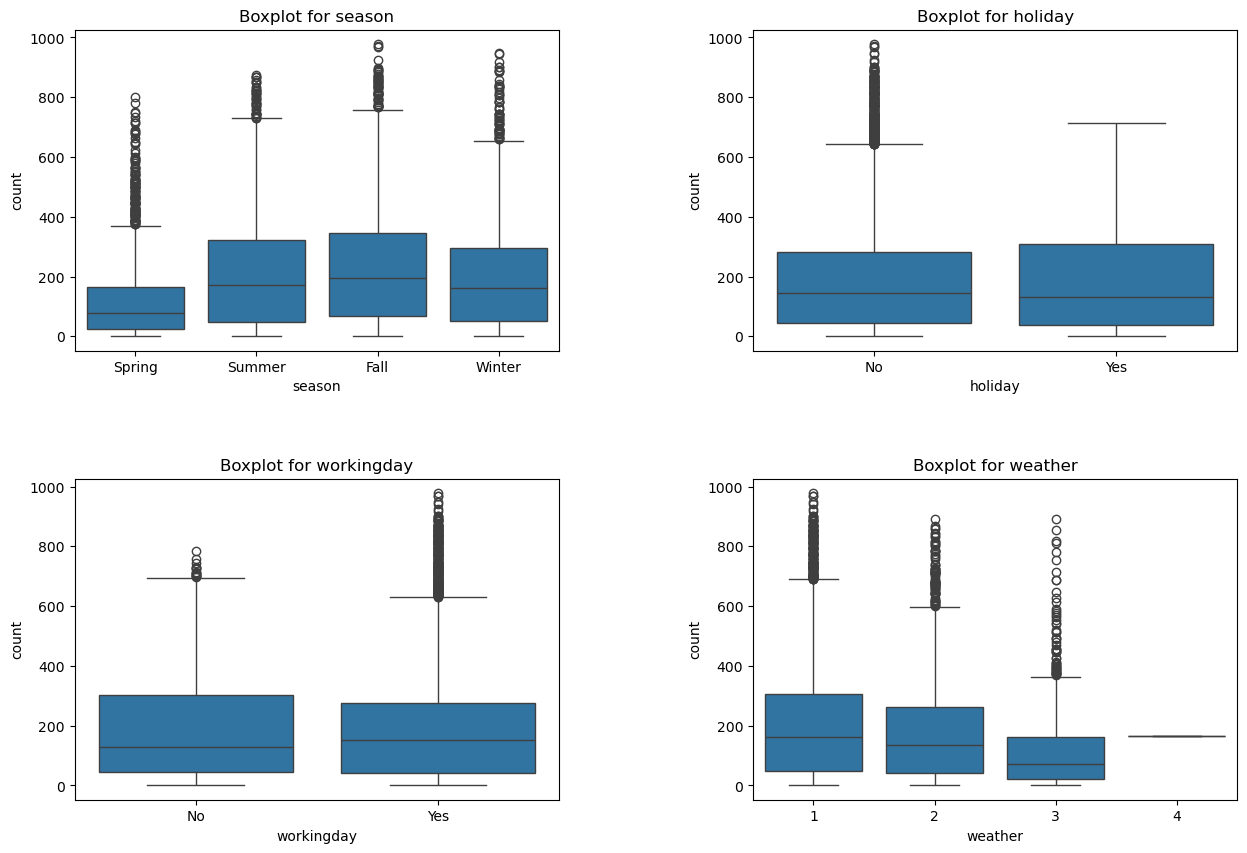

In [153]:
plt.figure(figsize=(15,10))
for i in enumerate(cat_col):
    plt.subplot(2,2,i[0]+1)
    sns.boxplot(data=df,x=i[1],y='count')
    plt.title(f'Boxplot for {i[1]}')
plt.subplots_adjust(hspace=0.4,wspace=0.4)
plt.show()

## Outlier Analysis

## Outliers in Different Seasons:

### In spring and winter, there are more unusual values in the data compared to other seasons.

## Weather Outliers:
#### Category 3 weather has a lot of unusual values, while category 4 weather doesn't have any.

## Working Days vs. Holidays:
#### On regular working days, there are more unusual values in the data than on holidays. This suggests some unexpected patterns during typical workdays that might need a closer look.

# *Exploratory Data Analysis*

#### *What is the total count and percentage of rental bikes on working day and Notworking day.*

In [154]:
working_day_count = df["workingday"][df.workingday == "Yes"].count()
Nworking_day_count = df["workingday"][df.workingday == "No"].count()

In [155]:
WDperc=  (working_day_count /df.shape[0]) *100
print(f"{WDperc.round()}% of the bikes are rented in working days")

68.0% of the bikes are rented in working days


In [156]:
NWDperc=  (Nworking_day_count /df.shape[0]) *100
print(f"{NWDperc.round()}% of the bikes are rented in non working days")

32.0% of the bikes are rented in non working days


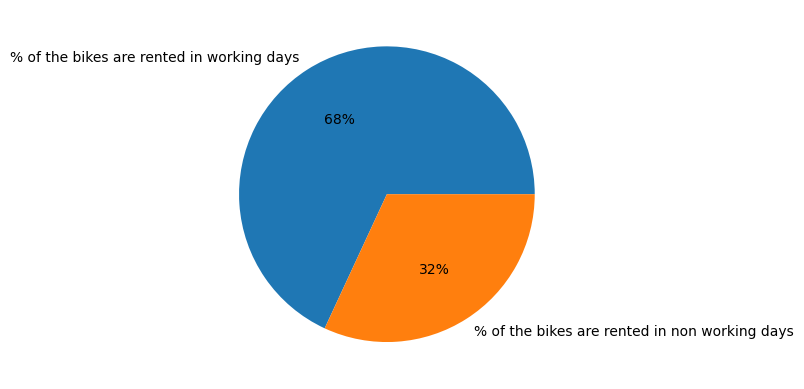

In [157]:
plt.pie(x=[WDperc,NWDperc],labels=["% of the bikes are rented in working days","% of the bikes are rented in non working days"],autopct='%.0f%%')
plt.show()

- #### *Total No. of rental bikes were used on Working day is arround 7110 and its percentage is 68%, by this data we can clearly understand that people use more frequestly during weekdays.*

## *Which season and weather is mostly prefered by people to commute using Yulu?*

In [158]:
df["season"].unique()

['Spring', 'Summer', 'Fall', 'Winter']
Categories (4, object): ['Spring', 'Summer', 'Fall', 'Winter']

In [159]:
df["weather"].unique()

[1, 2, 3, 4]
Categories (4, int64): [1, 2, 3, 4]

In [160]:
pd.crosstab(df['season'], df['count'])

count,1,2,3,4,5,6,7,8,9,10,...,897,900,901,917,925,943,948,968,970,977
season,,,,,,,,,,,,,,,,,,,,,
Spring,76,77,76,52,40,26,35,26,18,19,...,0,0,0,0,0,0,0,0,0,0
Summer,16,25,24,38,45,38,18,19,23,16,...,0,0,0,0,0,0,0,0,0,0
Fall,4,8,14,28,40,38,27,26,21,27,...,1,0,0,0,1,0,0,1,1,1
Winter,9,22,30,31,44,33,38,28,21,33,...,0,1,1,1,0,1,1,0,0,0


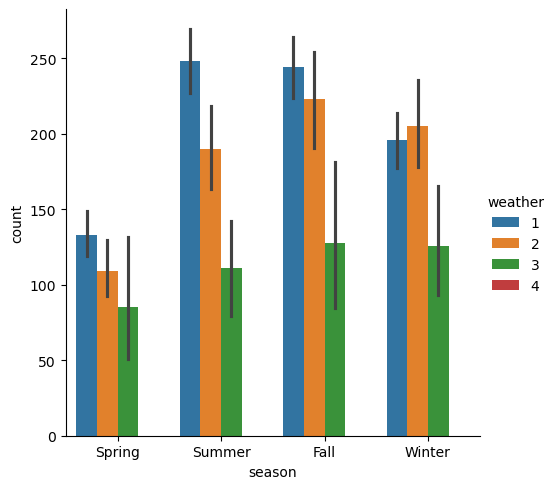

In [161]:
sns.catplot(data=df.sample(2000),x="season",y="count",hue="weather",kind='bar')

In [162]:
seasons= df.groupby(['season','weather']).agg({"count":"sum","temp":"mean","atemp":"mean"}).reset_index().rename(columns={"count":"people used"})
seasons

,season,weather,people used,temp,atemp
0,Spring,1,223009,12.539147,15.135455
1,Spring,2,76406,12.626853,15.548713
2,Spring,3,12919,12.152322,14.943199
3,Spring,4,164,8.200000,11.365000
4,Summer,1,426350,23.180822,27.033373
5,Summer,2,134177,22.490932,26.345071
6,Summer,3,27755,21.001518,24.496004
7,Summer,4,0,NaN,NaN
8,Fall,1,470116,29.227264,33.044816
9,Fall,2,139386,28.048344,31.772434


In [163]:
pivot_table= seasons.pivot_table(index="season",columns="weather",values="people used")

In [164]:
pivot_table

weather,1,2,3,4
season,,,,
Spring,223009.0,76406.0,12919.0,164.0
Summer,426350.0,134177.0,27755.0,0.0
Fall,470116.0,139386.0,31160.0,0.0
Winter,356588.0,157191.0,30255.0,0.0


Text(0.5, 1.0, 'Rental Bike usage')

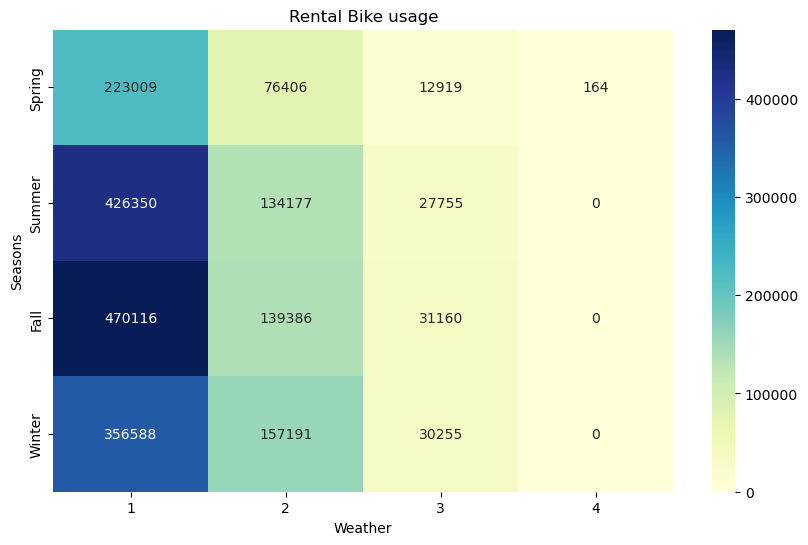

In [165]:
plt.figure(figsize=(10,6))
sns.heatmap(pivot_table,annot= True,fmt=".0f",cmap='YlGnBu')
plt.xlabel("Weather")
plt.ylabel("Seasons")
plt.title("Rental Bike usage")


## *Interpretation:*
####  *By this data we can say that people use Rental bikes mostly during Weather 1 and Fall Season, Because in weather 1 refers to clear sky, party clouds and that why people used Yulu during that time and also during the Fall season most of the people had used Rental bike due to the moderate temperature.*

## *At what time interval people use yulu most frequently?*

In [166]:
hours= df.groupby(['hour', 'weather']).agg({'casual':'sum', 'registered':'sum', 'count':'sum'}).reset_index()
hours

,hour,weather,casual,registered,count
0,0,1,3523,14691,18214
1,0,2,1063,5043,6106
2,0,3,106,662,768
3,0,4,0,0,0
4,1,1,2080,8317,10397
...,...,...,...,...,...
91,22,4,0,0,0
92,23,1,5150,24401,29551
93,23,2,1460,7285,8745
94,23,3,441,2079,2520


In [167]:
x= [i for i in hours["hour"].values]
y= [i for i in hours["count"].values]

In [168]:
plt.figure(figsize=(7,5))
fig = px.histogram(x=x, y=y, labels={'x': 'No of hours', 'y': ''}, title='Percentage of electic cycles being used', histnorm='percent')
fig.update_xaxes(tickvals=x)

# Display the interactive plot
fig.show()

<Figure size 700x500 with 0 Axes>

## *Interpretation:*

#### *By this graph we can say that people constantly used yulu during 3pm to 7pm, because most of people commute during this time because of the weather. after 7pm there is drastic decrease in usage of Electric cycles*

## *What is the top 5 hours where people used electric cycles*

In [169]:
t5hrs= df.groupby("hour")["count"].sum().sort_values(ascending=False)[:5].reset_index()
t5hrs

,hour,count
0,17,213757
1,18,196472
2,8,165060
3,16,144266
4,19,143767


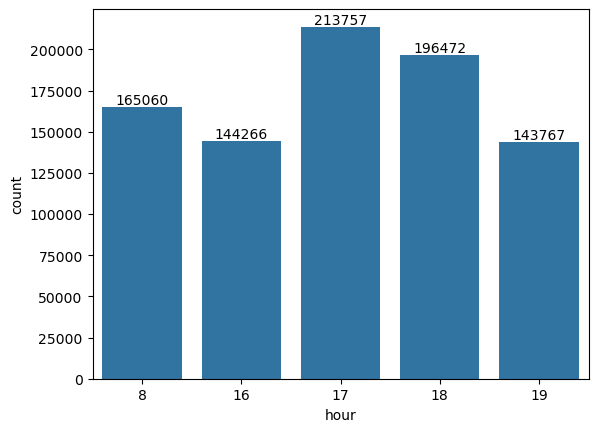

In [170]:
gt5= sns.barplot(data = t5hrs,x="hour",y="count")
for c in gt5.containers:
    gt5.bar_label(c)
plt.show()

# *Correlation*

In [171]:
corr=round(df.corr(numeric_only=True),2)
corr

,temp,atemp,humidity,windspeed,casual,registered,count,year,day,hour
temp,1.00,0.98,-0.06,-0.02,0.47,0.32,0.39,0.06,0.02,0.15
atemp,0.98,1.00,-0.04,-0.06,0.46,0.31,0.39,0.06,0.01,0.14
humidity,-0.06,-0.04,1.00,-0.32,-0.35,-0.27,-0.32,-0.08,-0.01,-0.28
windspeed,-0.02,-0.06,-0.32,1.00,0.09,0.09,0.10,-0.02,0.04,0.15
casual,0.47,0.46,-0.35,0.09,1.00,0.50,0.69,0.15,0.01,0.30
registered,0.32,0.31,-0.27,0.09,0.50,1.00,0.97,0.26,0.02,0.38
count,0.39,0.39,-0.32,0.10,0.69,0.97,1.00,0.26,0.02,0.40
year,0.06,0.06,-0.08,-0.02,0.15,0.26,0.26,1.00,0.00,-0.00
day,0.02,0.01,-0.01,0.04,0.01,0.02,0.02,0.00,1.00,0.00
hour,0.15,0.14,-0.28,0.15,0.30,0.38,0.40,-0.00,0.00,1.00


<Axes: >

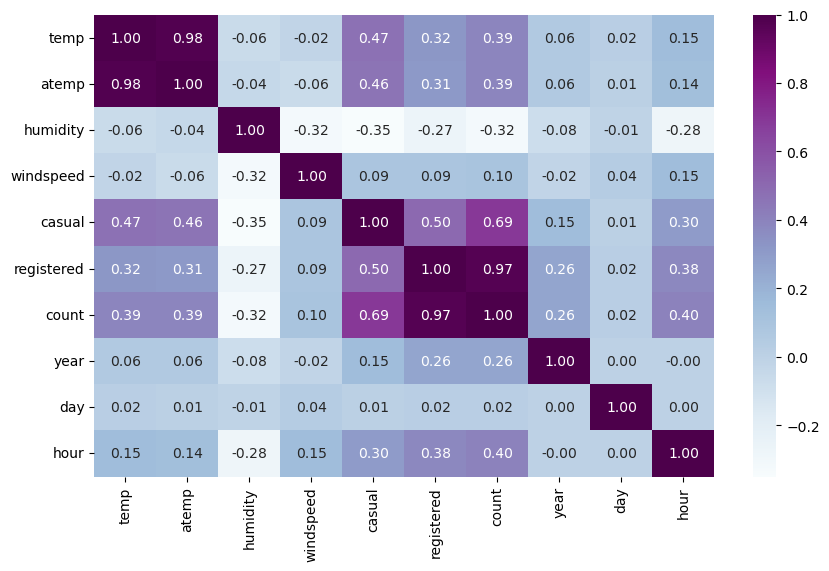

In [172]:
plt.figure(figsize=(10,6))
sns.heatmap(data=corr,annot= True,fmt='0.2f',cmap="BuPu")

Interpretation:

Here we have summarized only correlation between the numberical variable 

* The Correlation between count - casual and registered are strong possitive correlation because the count is sum of casual and registered.

* There is minor positive correlation between count and temperature and atemperature(0.39) and (0.38). As the temperature increases count also increases.

* We could see a negative correlation between count and Humidity, as humudity increases the rental count decreases.

* Also hour has some correlation in usage of electric cycles(0.43)

# *Hypothesis Testing:*

#### *1. Does Working day has effect on number of electric cycles rented, Verify at 5 % level of Significance*

In [173]:
df.groupby("workingday")["count"].describe()

,count,mean,std,min,25%,50%,75%,max
workingday,,,,,,,,
No,3474.0,188.506621,173.724015,1.0,44.0,128.0,304.0,783.0
Yes,7412.0,193.011873,184.513659,1.0,41.0,151.0,277.0,977.0


### *Defining Null and Alternative Hypothesis*
- ##### *Null Hypothesis (H0) : Working day does not have any effect on number of electic cycles rented, where mu = 0*

- ##### *Alternative Hypothesis(H1): Working day has significant effect on number of electric cycles rented, where mu !=0*

### *Normality Check*
- ##### *H0: The Sample follows Normal Distribution*

- ##### *H1: The Sample does not follows Normal Distibution*

- ##### *alpha = 0.05*

In [190]:
wd=df[df["workingday"] == "Yes"]["count"]
nwd=df[df["workingday"] == "No"]["count"]

In [199]:
# normality of Workingday
t_statistics,pvalue= stats.shapiro(wd)
print(f"Pvalue :{pvalue.round()}")

Pvalue :0.0


In [201]:
if pvalue < 0.05:
    print("The sample does not follow sample distribution")
else:
    print("The sample value follows normal distribution")

The sample does not follow sample distribution


In [202]:
# normality of NON Workingday
t_statistics,pvalue= stats.shapiro(nwd)
print(f"Pvalue :{pvalue.round()}")

Pvalue :0.0


In [203]:
if pvalue < 0.05:
    print("The sample does not follow sample distribution")
else:
    print("The sample value follows normal distribution")

The sample does not follow sample distribution


- #### *Since the samples are not following the Normal Distibution, We can apply T-test. We need to perform the Non parametric equivalent test Mann-Whitney U rank test for two independent samples*

## *Test of Variance*

- #### *H0 : No Significant difference in Variance between Workingday and Not Workingday*

- #### *H1: Siginificant difference in Variance between Workingday and Not Workingday*

In [207]:
t_staistics,pvalue= stats.levene(wd,nwd)
print(f"Pvalue:{pvalue}")

if pvalue < 0.05:
    print(f"Reject the null hypothesis,Pvalue:{pvalue.round()}")
else:
    print(f"Failed to reject the null hypothesis,Pvalue:{pvalue.round()}")

Pvalue:0.9437823280916695
Failed to reject the null hypothesis,Pvalue:1.0


## *Non Parametric Test*
### *Null Hypothesis (H0) : There is no effect on number of electic cycles rented, where median is equal*

### *Alternative Hypothesis(H1): There is a significant effect on number of electric cycles rented, where median not equal*

In [209]:
U_statistics, pvalue = stats.mannwhitneyu(wd, nwd)
if pvalue < 0.05:
    print(f'Reject the Null Hypothesis, Pvalue {pvalue}')
else:
    print(f'Failed to reject the Null Hypothesis, Pvalue {pvalue}')

Failed to reject the Null Hypothesis, Pvalue 0.9679139953914079


#### *Conclusion: The Median no.of electric cycle is same for both working and Non working days.*

# *2. Is there any association between season and weather*

In [211]:
df[["weather","season"]].describe()

,weather,season
count,10886,10886
unique,4,4
top,1,Winter
freq,7192,2734


## *Defining Null and Alternative Hypothesis*
#### *Null Hypothesis (H0) : Weather and season are Independent Variable*

#### *Alternate Hypothesis (H1): Weather and seasons are dependent variable.*

#### *As it is two categorical features, the chi-square test is applicable here, the test statistics follows chi-square distribution.*

In [218]:
tab= pd.crosstab(index= df["season"],columns=df["weather"],values = df["count"],aggfunc= np.sum).replace(np.nan,0)
tab

weather,1,2,3,4
season,,,,
Spring,223009,76406,12919,164
Summer,426350,134177,27755,0
Fall,470116,139386,31160,0
Winter,356588,157191,30255,0


In [220]:
cross_table = pd.crosstab(index=df['season'], 
                   columns=df.loc[df['weather' ]!=4, 'weather'], 
                   values=df['count'],
                   aggfunc=np.sum).to_numpy()[:, :3]

In [221]:
cross_table

array([[223009,  76406,  12919],
       [426350, 134177,  27755],
       [470116, 139386,  31160],
       [356588, 157191,  30255]], dtype=int64)

In [222]:
t_statistics, pvalue, dof, expected_frequency=stats.chi2_contingency(observed=cross_table)

In [223]:
expected_frequency

array([[221081.86259035,  75961.44434981,  15290.69305984],
       [416408.3330293 , 143073.60199337,  28800.06497733],
       [453484.88557396, 155812.72247031,  31364.39195574],
       [385087.91880639, 132312.23118651,  26633.8500071 ]])

In [224]:
if pvalue < 0.05:
    print('Reject the Null hypothesis')
else:
    print('Failed to reject the Null hypothesis')

Reject the Null hypothesis


## *Therefore there is a statistically significant dependency of weather and season based on the number of cycles rented.*